In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

1. Buscar un conjunto de datos a analizar:

Zarigueyas

In [11]:
df = pd.read_csv("../datos/possum.csv")

In [12]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado: 

In [17]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [18]:
df['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [19]:
df['Pop'].value_counts()

other    58
Vic      46
Name: Pop, dtype: int64

In [20]:
# site: sitios de muestreo. 

df['site'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [37]:
df.describe()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [36]:
df.describe(include = "O")

,case,site,Pop,sex
count,104,104,104,104
unique,104,7,2,2
top,1,1,other,m
freq,1,33,58,61


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [21]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [31]:
# vamos a cambiar el tipo de "site" y "case" a categoricas, pues no nos sirven como numéricas. 
df[["case", "site"]]=df[["case", "site"]].astype("object")

In [32]:
categoricas = df.select_dtypes(include="object")
categoricas.head(2) 

,case,site,Pop,sex
0,1,1,Vic,m
1,2,1,Vic,f


In [33]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2) 

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


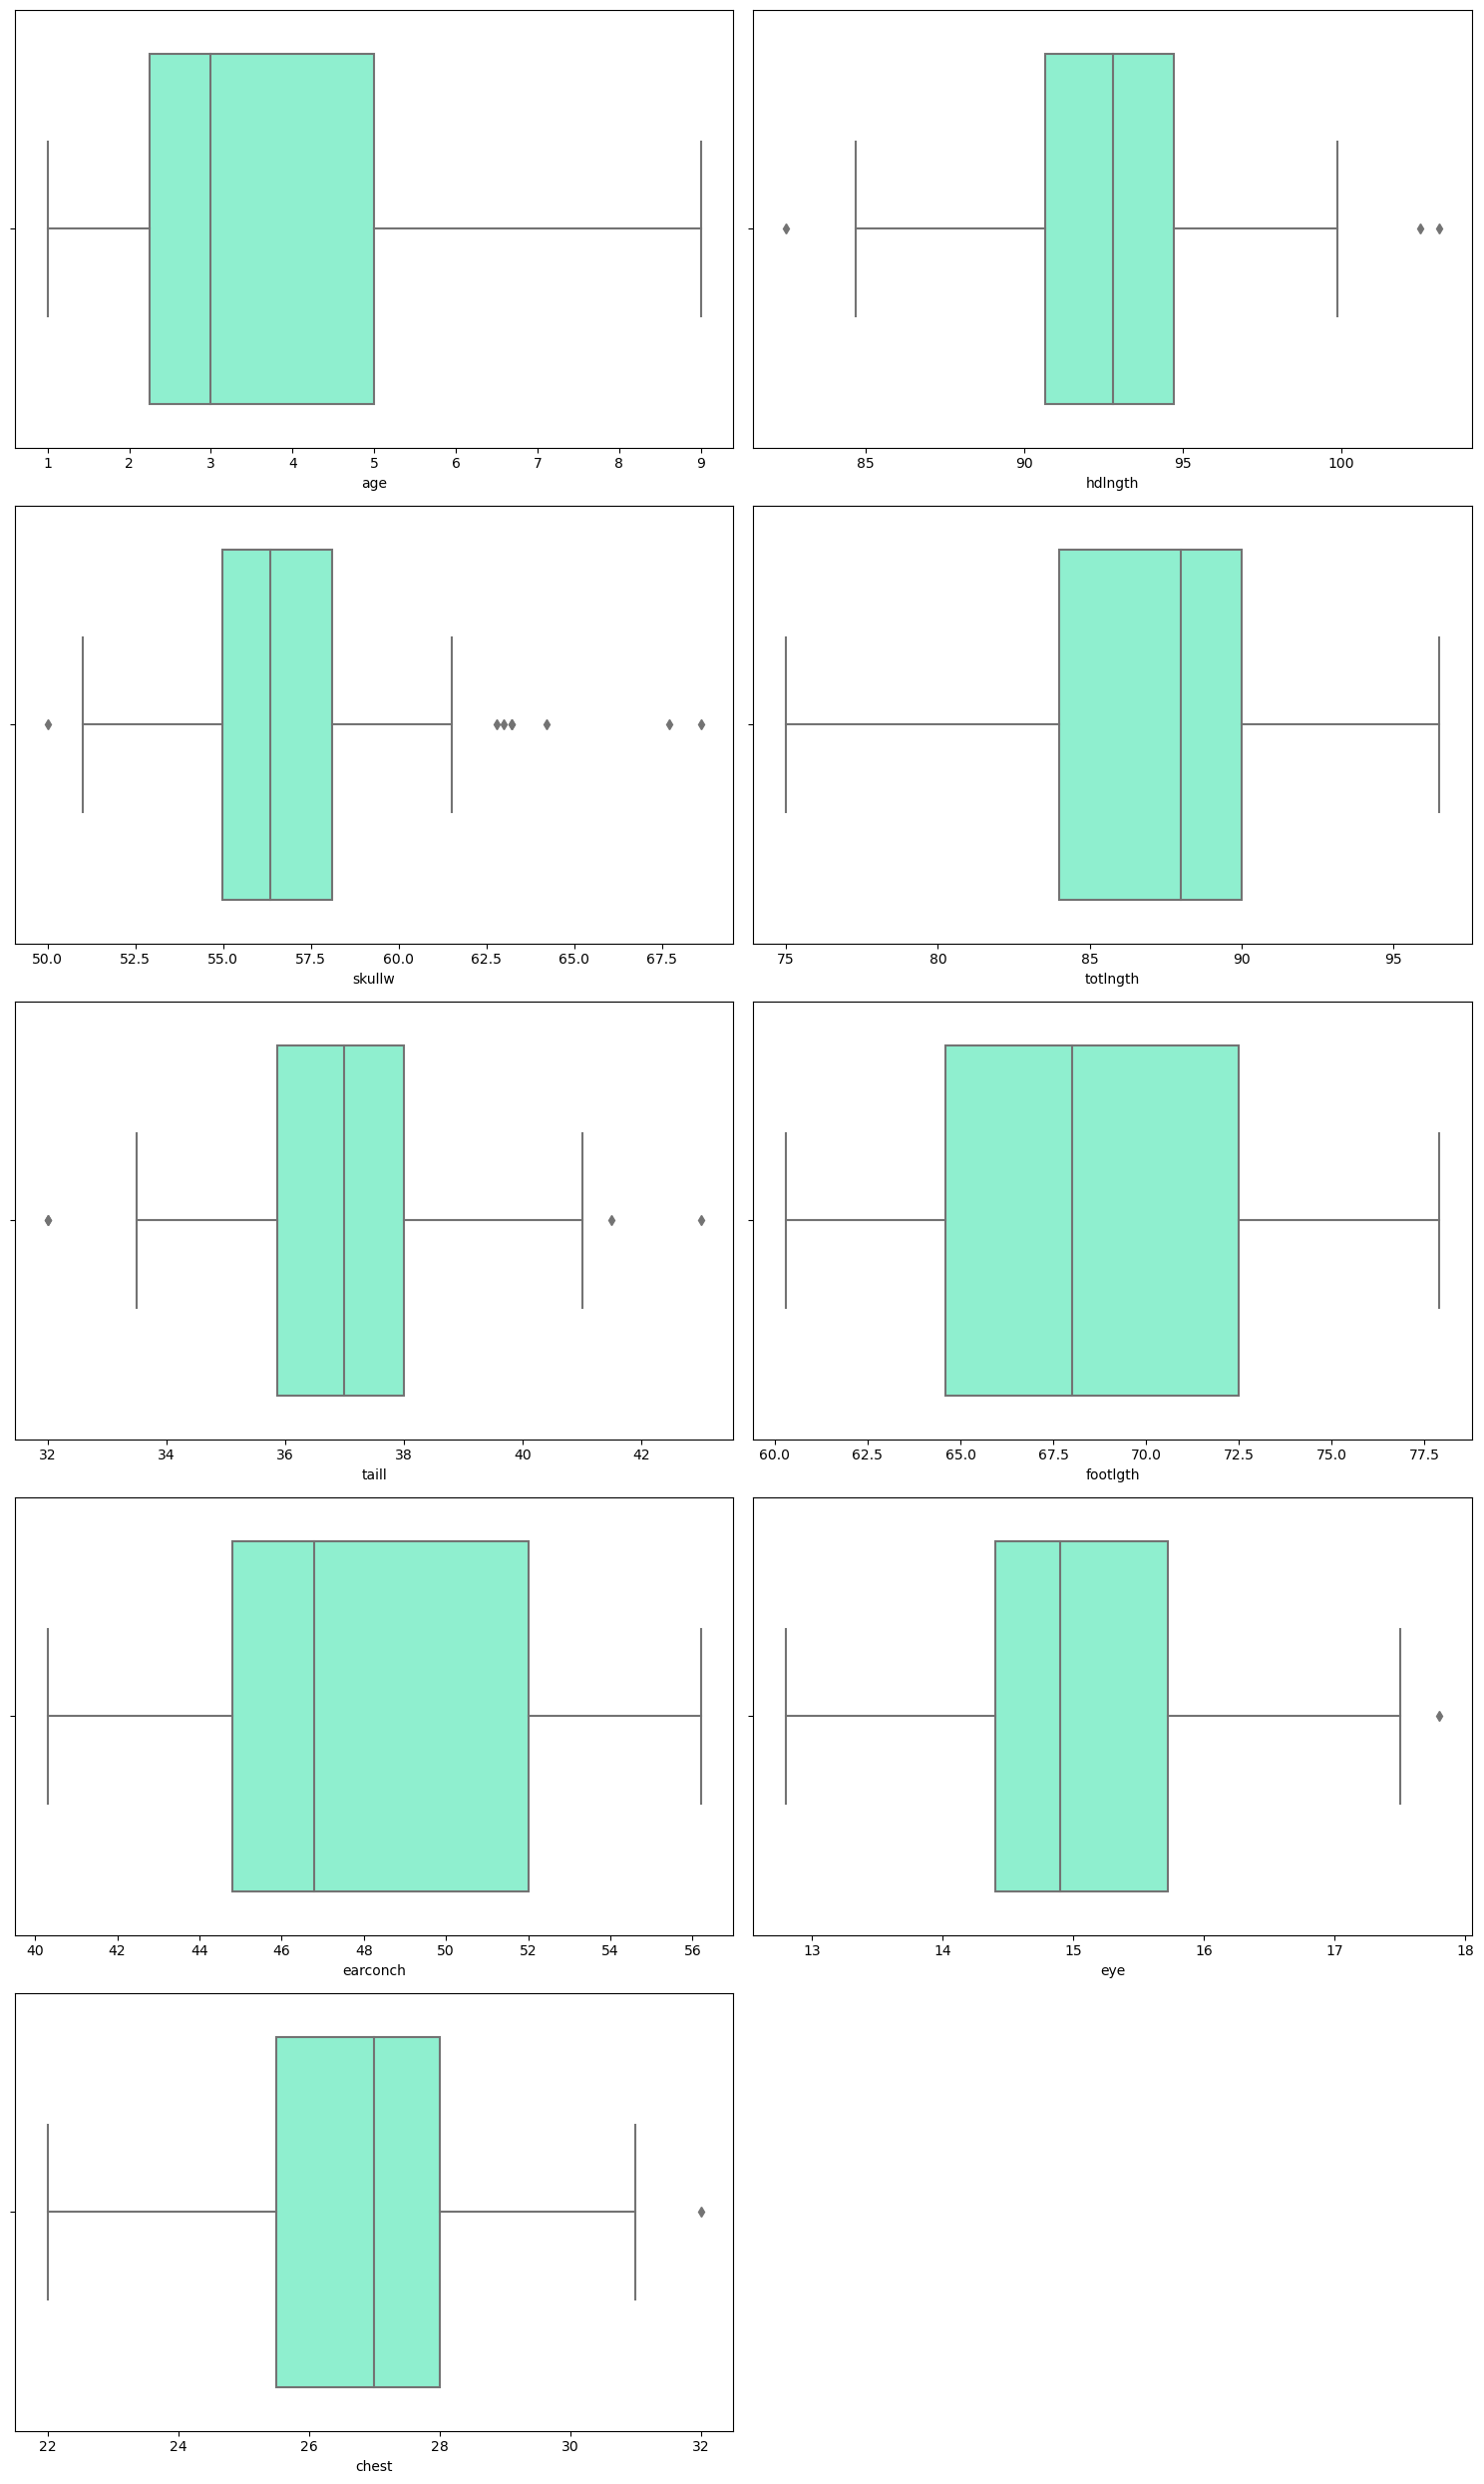

In [35]:
fig, axes = plt.subplots(5, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad


plt.tight_layout()
fig.delaxes(axes[-1])
plt.show() 

SKULL: descartamos eliminar outliers en este valor, pues los rangos totales desde el min al max nos parecen correctos. Los que se tectan cómo ouliers son, a nuestro parecer, valores de sujetos reales. 

In [39]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

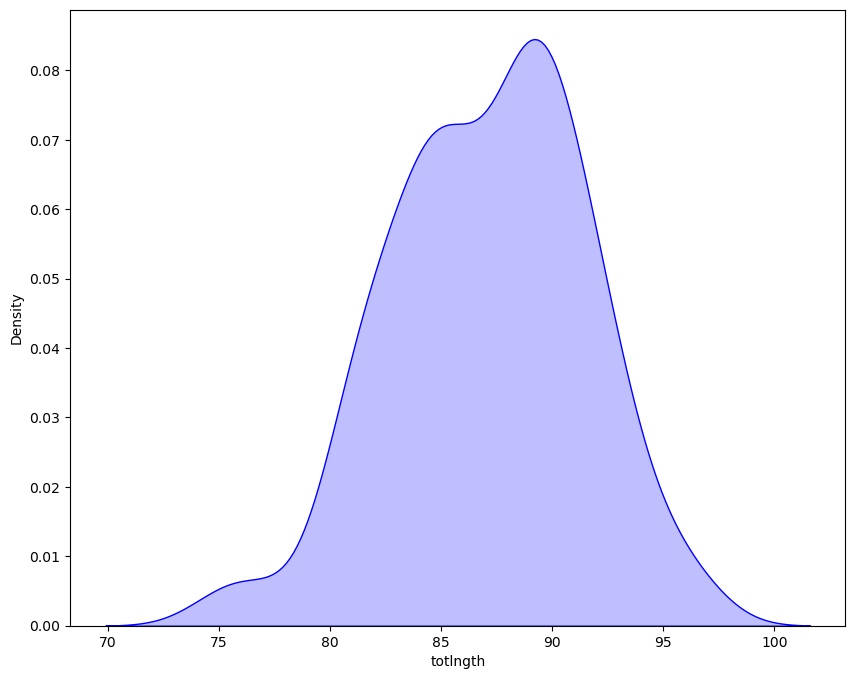

In [40]:
# vamos a ver visualmente como está distribuida la variable respuesta

sns.distplot(
df['totlngth'], # variable respuesta
hist = False, 
color = "blue", 
kde_kws = {"shade": True, "linewidth": 1}); 

La variable respuesta longitud total ('totlngth'), tiene una distribución normal preciosa. 

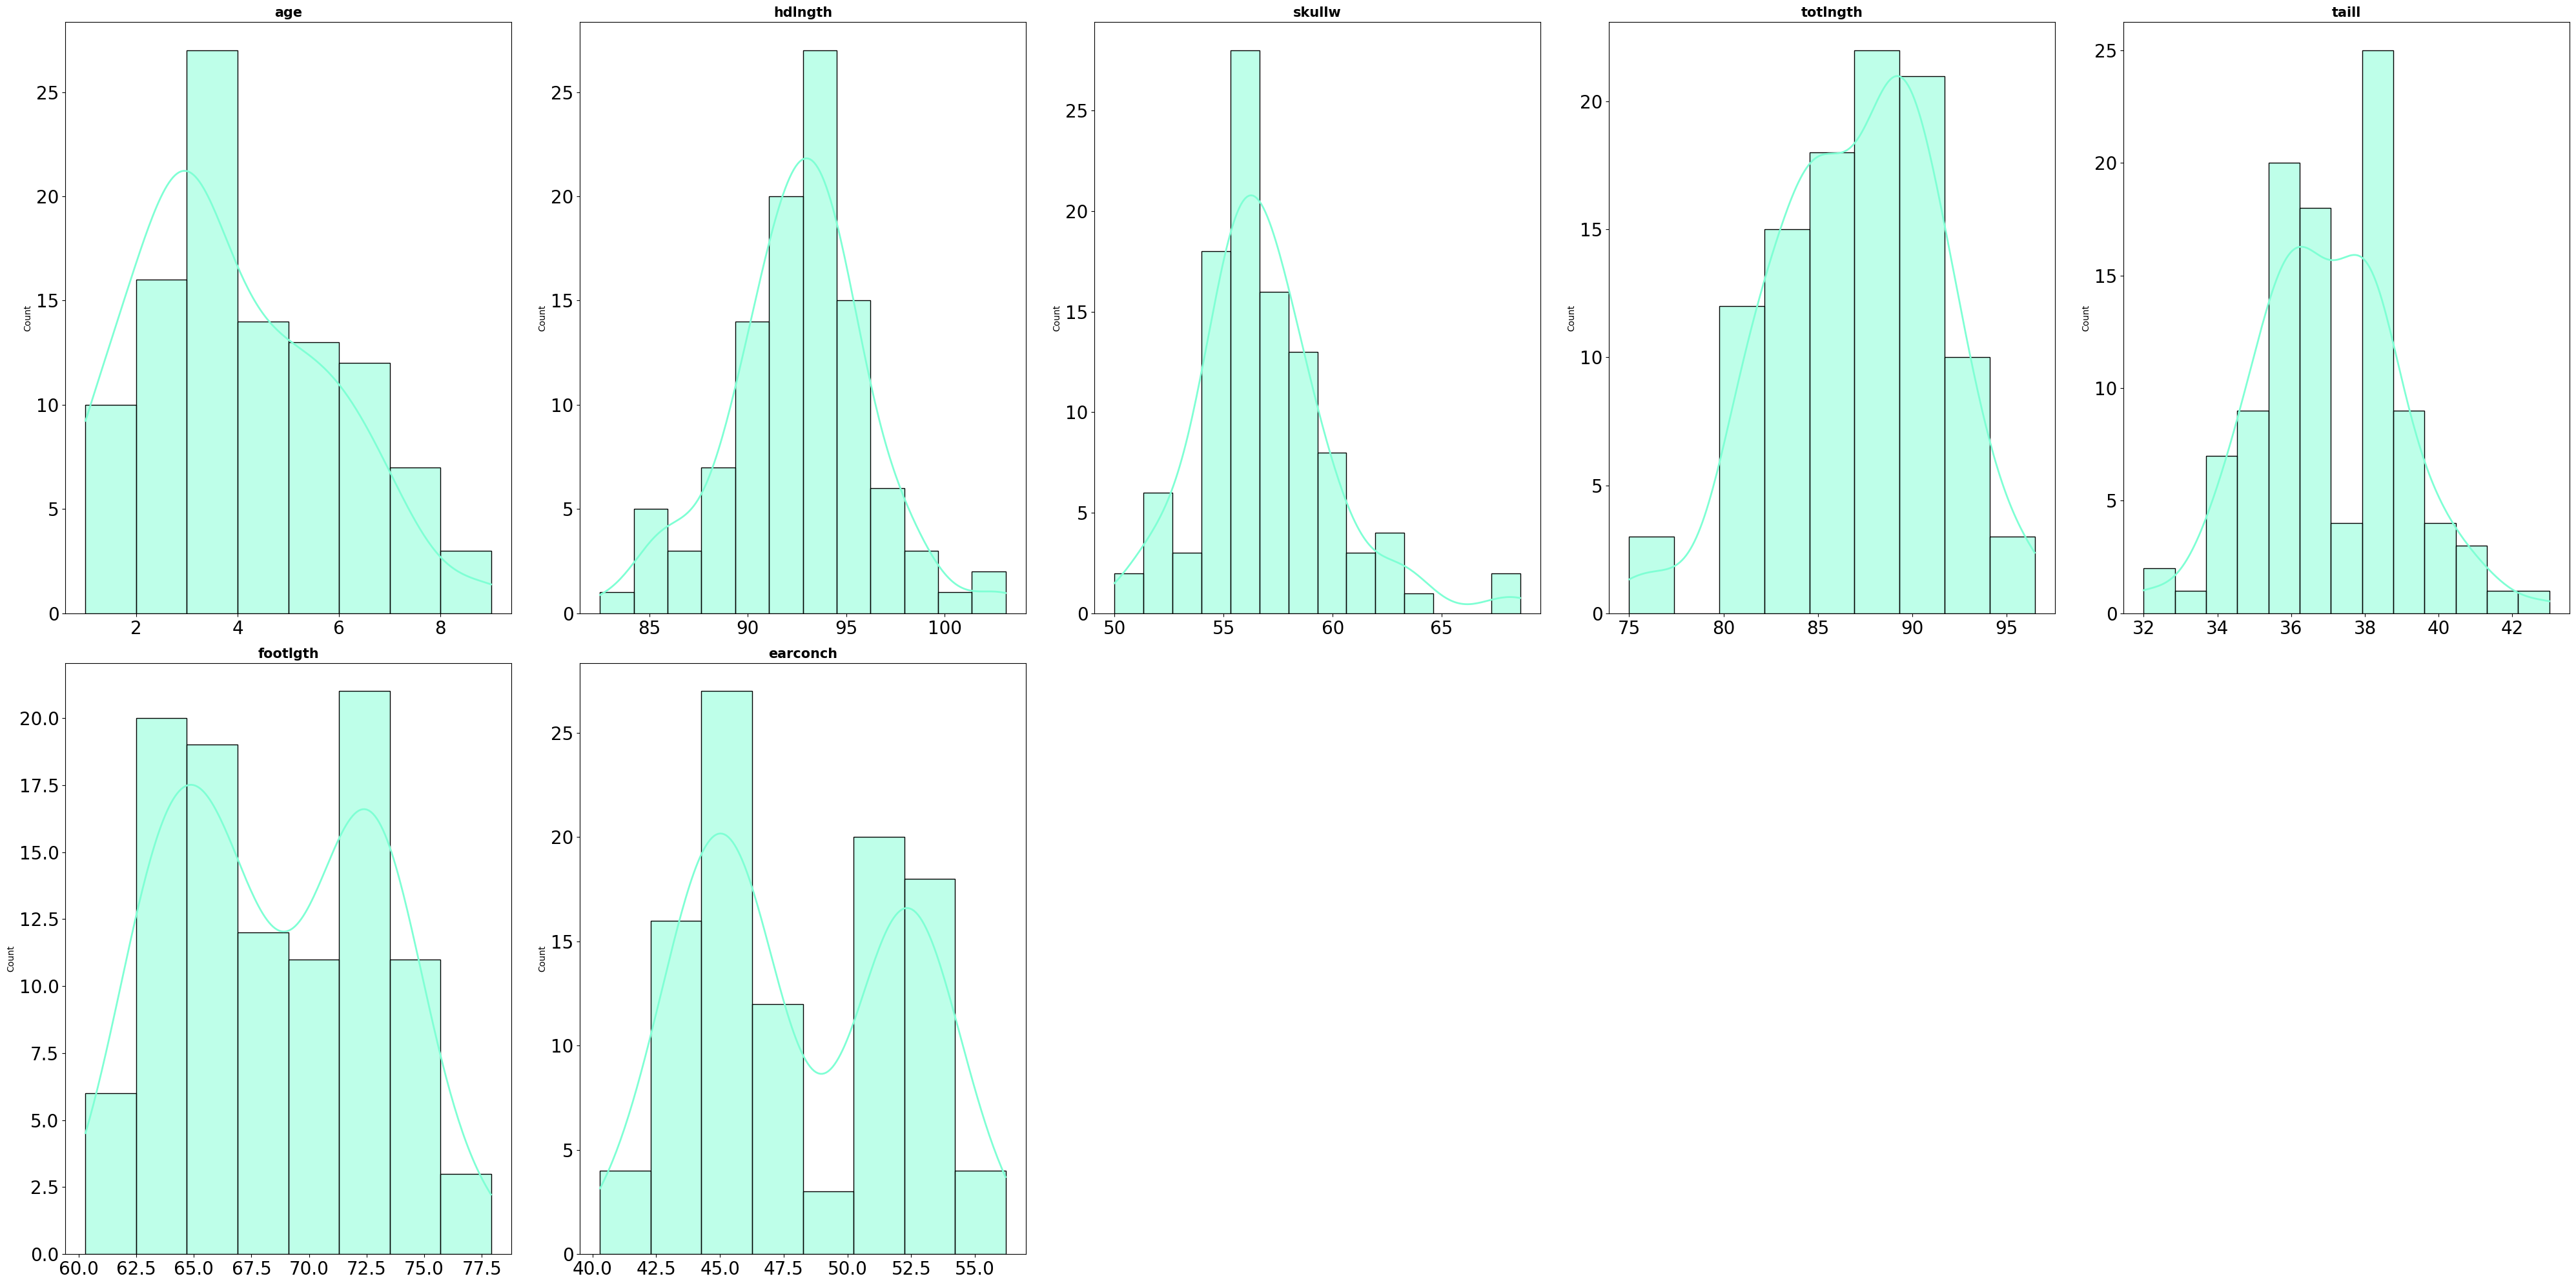

In [43]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (40, 20))


axes = axes.flat


for i, colum in enumerate(numericas): 
    sns.histplot(
    data = df,
    x = colum,
    kde = True, 
    color = "aquamarine", 
    line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
    alpha = 0.5, # para especificar la transparencia del color
    ax = axes[i])


    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]); 

3. Realizar un EDA sencillo para la variable dependiente y la variable independiente. 